In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)

import sidetable as stb
from itertools import combinations
import researchpy as rp

from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = None 

In [109]:
df = pd.read_csv('../data/data_cardiovascular_risk.csv', index_col = 0).reset_index(drop = True)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [110]:
df.index

RangeIndex(start=0, stop=3390, step=1)

In [111]:
df.tail(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [112]:
df.sample(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
92,36,1.0,F,NO,0.0,0.0,0,0,0,165.0,115.0,71.0,21.27,64.0,86.0,0
2528,51,1.0,F,YES,30.0,0.0,0,0,0,272.0,133.0,91.0,28.50,72.0,NaN,0
563,44,1.0,M,YES,40.0,0.0,0,1,0,201.0,142.5,104.5,34.59,67.0,67.0,0
128,67,2.0,F,NO,0.0,NaN,0,0,0,261.0,117.0,63.0,22.55,75.0,83.0,0
207,57,1.0,F,NO,0.0,0.0,0,0,0,219.0,125.0,83.0,23.22,65.0,115.0,0
1063,60,1.0,M,NO,0.0,0.0,0,1,0,270.0,145.0,81.0,29.37,75.0,73.0,0
2925,36,4.0,M,NO,0.0,0.0,0,0,0,194.0,117.0,90.0,27.08,73.0,87.0,0
902,40,1.0,F,NO,0.0,0.0,0,0,0,190.0,122.0,78.0,28.18,86.0,87.0,0
820,43,1.0,M,YES,43.0,0.0,0,0,0,215.0,122.0,76.0,26.84,85.0,74.0,0
1393,52,1.0,F,YES,20.0,0.0,0,0,0,232.0,115.0,80.0,28.79,72.0,68.0,0


In [113]:
df.shape

(3390, 16)

In [114]:
df.duplicated().sum()
# We do not have duplicate rows.

0

In [115]:
df.dtypes

age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [116]:
# We define our response variable.

response_var = 'TenYearCHD'

In [117]:
# Some columns are categorical variables, despite containing numerical data. We change the variable types.
# We also change the 'object' columns.

categorical_list = ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'sex', 'is_smoking']

for col in categorical_list:
    df[col] = df[col].astype('category')

In [118]:
# We ensure that the variable types have been updated.

df.dtypes

age                   int64
education          category
sex                category
is_smoking         category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

### EXPLORE AND REPLACE NULLS
-----
We have missing data that we need to replace. We will use the KNN Imputer approach for this.
However, if we have values with decimal places, we round them off to get whole numbers.

In [119]:
df.stb.missing()

,missing,total,percent
glucose,304,3390,8.967552
education,87,3390,2.566372
BPMeds,44,3390,1.297935
totChol,38,3390,1.120944
cigsPerDay,22,3390,0.648968
BMI,14,3390,0.412979
heartRate,1,3390,0.029499
age,0,3390,0.000000
sex,0,3390,0.000000
is_smoking,0,3390,0.000000


In [120]:
class Nulls_cleaner:

    def __init__(self, dataframe):

        self.dataframe = dataframe


    def _clean_num_null_values_with_knn(self):

        """Apply the KNN imputation method to numeric columns in the dataframe.
        Args:
            dataframe: dataframe where we want to apply the method.
        Returns:
            dataframe: dataframe whitout numeric missing values.
        """

        numerical_dataframe = self.dataframe.select_dtypes(include = np.number)

        imputerKNN = KNNImputer(n_neighbors=5)
        imputerKNN.fit(numerical_dataframe)
        numerical_knn = imputerKNN.transform(numerical_dataframe)
        knn_imputer_dataframe = pd.DataFrame(numerical_knn, columns = numerical_dataframe.columns)

        knn_columns = knn_imputer_dataframe.columns
        self.dataframe.drop(knn_columns, axis = 1, inplace = True)
        self.dataframe[knn_columns] = numerical_knn

        return self.dataframe


    def _clean_cat_null_values_with_mode(self):
        
        """For categorical columns in the dataframe, if the percentage of null values is more than 10%,
        replace them with a new category called 'Unknown'. Otherwise, replace them with the mode.
        Args:
            dataframe: dataframe where we want to apply the method.
        Returns:
            dataframe: dataframe whitout categorical missing values.
        """
                
        categorical_dataframe = self.dataframe.select_dtypes(include = ['O', 'category'])

        cat_cols_with_nulls = categorical_dataframe.columns[categorical_dataframe.isnull().any()].tolist()

        for col in cat_cols_with_nulls:
            
            null_percentage = self.dataframe[col].isna().mean() * 100 

            if null_percentage  >= 10:
                self.dataframe[col].fillna('Unknown', inplace = True)
            else:
                self.dataframe[col].fillna(self.dataframe[col].mode()[0], inplace = True)

        return self.dataframe


    def find_and_clean_all_null_values(self):

        """Use the previous functions to fill any null values in the dataframe with a single call.
        Args:
            dataframe: dataframe for null value imputation.
        Returns:
            dataframe: dataframe whitout missing values.
        """
        
        dataframe_result = self._clean_num_null_values_with_knn()
        dataframe_result = self._clean_cat_null_values_with_mode()

        return dataframe_result

In [121]:
nulls_cleaner = Nulls_cleaner(df)

In [122]:
df = nulls_cleaner.find_and_clean_all_null_values()

In [123]:
# We check that we have not any missing value.

df.stb.missing()

,missing,total,percent
education,0,3390,0.0
sex,0,3390,0.0
is_smoking,0,3390,0.0
BPMeds,0,3390,0.0
prevalentStroke,0,3390,0.0
prevalentHyp,0,3390,0.0
diabetes,0,3390,0.0
TenYearCHD,0,3390,0.0
age,0,3390,0.0
cigsPerDay,0,3390,0.0


### ADD CATEGORICAL VARIABLES INTO THE DATASET
----

In [124]:
df['BMI_category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obesity'])
df['age_category'] = pd.cut(df['age'], bins=[0, 17, 35, 59, float('inf')], labels=['Minors', 'Young Adults', 'Middle-Aged Adults', 'Senior Citizens'])

In [125]:
df.columns

Index(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD', 'age', 'cigsPerDay',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'BMI_category', 'age_category'],
      dtype='object')

In [126]:
new_order_columns = ['education', 'sex', 'age_category', 'BMI_category', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
                    'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [127]:
df = df[new_order_columns]

### EXPLORE CATEGORICAL AND NUMERICAL VARIABLES
----


In [128]:
# To continue the exploration, we divide the dataframe into categorical and numerical columns.

df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = ['category'])
df_cat.drop([response_var], axis = 1, inplace = True)

##### CATEGORICAL VARIABLES

In [129]:
df_cat.describe().T

,count,unique,top,freq
education,3390.0,4.0,1.0,1478.0
sex,3390,2,F,1923
age_category,3390,3,Middle-Aged Adults,2783
BMI_category,3390,4,Normal Weight,1487
is_smoking,3390,2,NO,1703
BPMeds,3390.0,2.0,0.0,3290.0
prevalentStroke,3390,2,0,3368
prevalentHyp,3390,2,0,2321
diabetes,3390,2,0,3303


In [130]:
# We examine the frequency and percentages of categorical variables.

for col in df_cat:
    df.stb.freq([col])

,education,count,percent,cumulative_count,cumulative_percent
0,1.0,1478,43.59882,1478,43.59882
1,2.0,990,29.20354,2468,72.80236
2,3.0,549,16.19469,3017,88.99705
3,4.0,373,11.00295,3390,100.00000


,sex,count,percent,cumulative_count,cumulative_percent
0,F,1923,56.725664,1923,56.725664
1,M,1467,43.274336,3390,100.000000


,age_category,count,percent,cumulative_count,cumulative_percent
0,Middle-Aged Adults,2783,82.094395,2783,82.094395
1,Senior Citizens,557,16.430678,3340,98.525074
2,Young Adults,50,1.474926,3390,100.000000


,BMI_category,count,percent,cumulative_count,cumulative_percent
0,Normal Weight,1487,43.864307,1487,43.864307
1,Overweight,1411,41.622419,2898,85.486726
2,Obesity,451,13.303835,3349,98.790560
3,Underweight,41,1.209440,3390,100.000000


,is_smoking,count,percent,cumulative_count,cumulative_percent
0,NO,1703,50.235988,1703,50.235988
1,YES,1687,49.764012,3390,100.000000


,BPMeds,count,percent,cumulative_count,cumulative_percent
0,0.0,3290,97.050147,3290,97.050147
1,1.0,100,2.949853,3390,100.000000


,prevalentStroke,count,percent,cumulative_count,cumulative_percent
0,0,3368,99.351032,3368,99.351032
1,1,22,0.648968,3390,100.000000


,prevalentHyp,count,percent,cumulative_count,cumulative_percent
0,0,2321,68.466077,2321,68.466077
1,1,1069,31.533923,3390,100.000000


,diabetes,count,percent,cumulative_count,cumulative_percent
0,0,3303,97.433628,3303,97.433628
1,1,87,2.566372,3390,100.000000


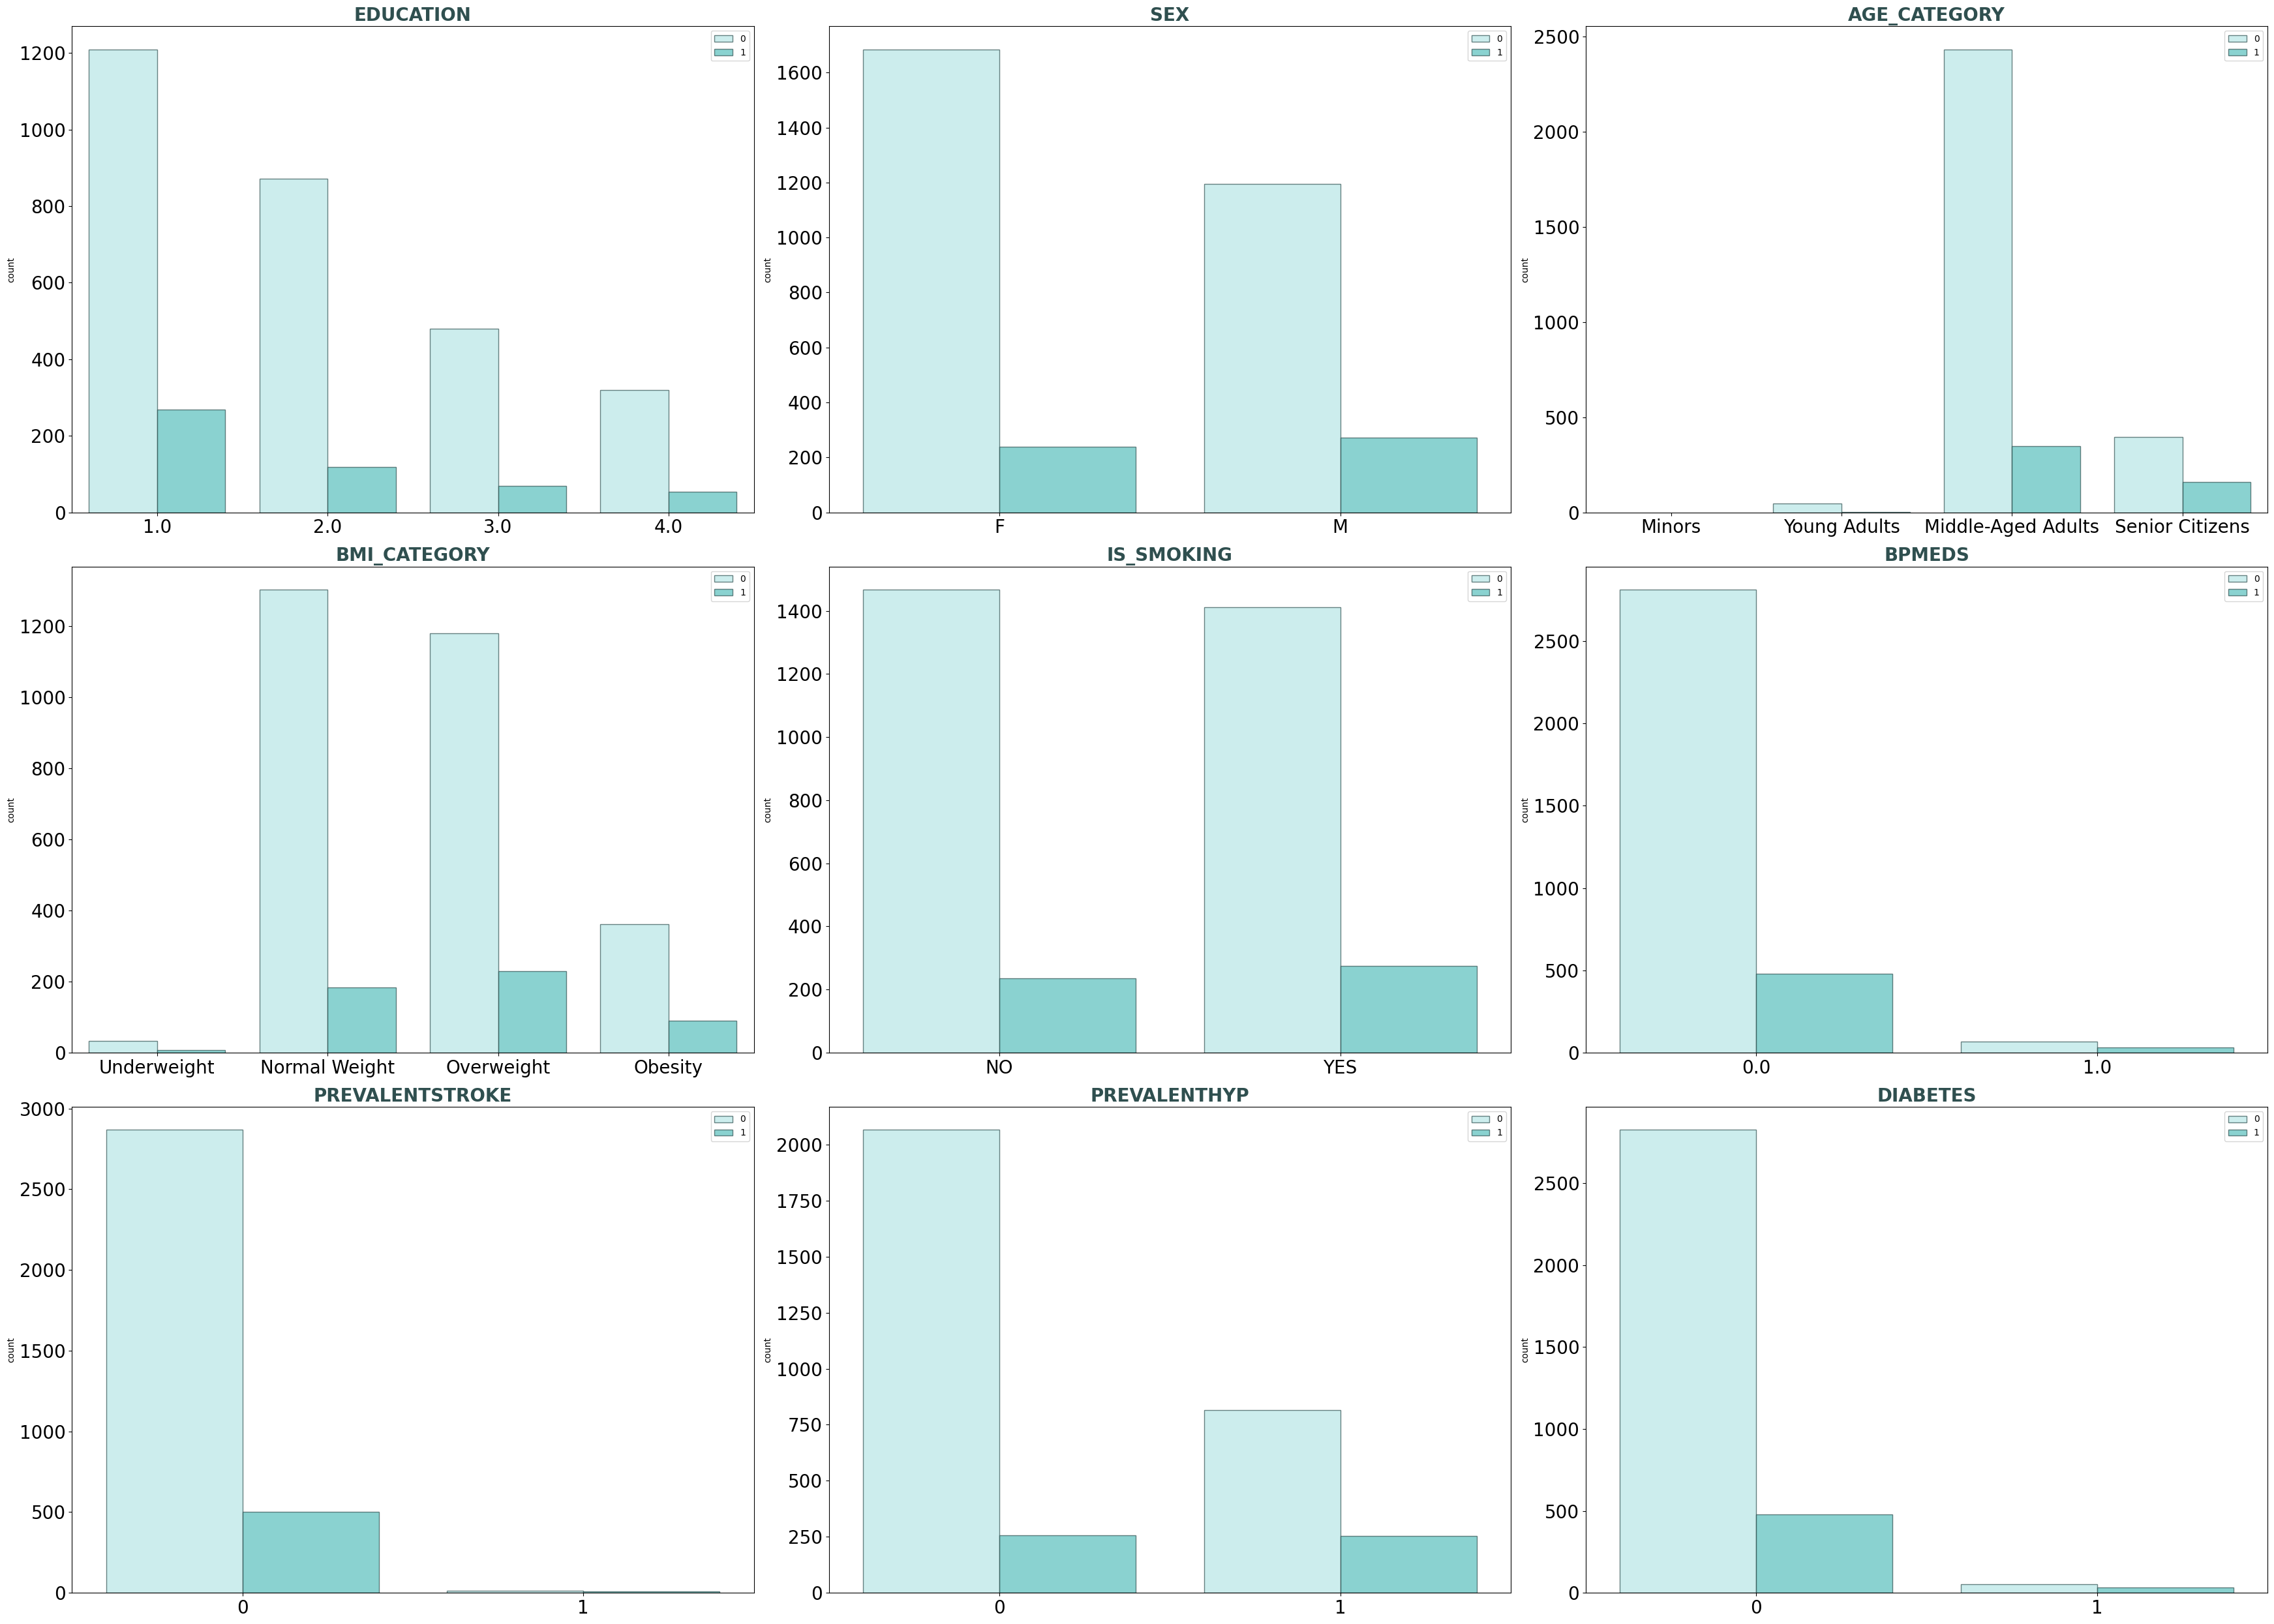

In [131]:
# We study the distribution of categorical variables with respect to the response variable.

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (35, 25))
axes = axes.flat

my_palette_1 = ['paleturquoise', 'mediumturquoise']

for index, colum in enumerate(df_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = response_var,
        alpha = 0.7, 
        palette = my_palette_1,
        edgecolor = 'darkslategrey',
        ax = axes[index])
    
    axes[index].set_title(colum.upper(), fontsize = 20, color = 'darkslategray', fontweight = "bold")
    axes[index].tick_params(labelsize = 20)
    axes[index].set_xlabel('')
    axes[index].legend(loc= 'upper right')

fig.tight_layout();

In [132]:
# We examine the correlation between categorical variables and the response variable.

for col in df_cat.columns:
    crosstab= rp.crosstab(df_cat[col], df[response_var], prop = 'row')
        
    display(crosstab)

TenYearCHD              
TenYearCHD          0      1    All
education                          
1.0             81.80  18.20  100.0
2.0             88.08  11.92  100.0
3.0             87.25  12.75  100.0
4.0             85.52  14.48  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0      1    All
sex                                
F               87.57  12.43  100.0
M               81.46  18.54  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD                  0      1    All
age_category                               
Young Adults            96.00   4.00  100.0
Middle-Aged Adults      87.42  12.58  100.0
Senior Citizens         71.45  28.55  100.0
All                     84.93  15.07  100.0

TenYearCHD              
TenYearCHD             0      1    All
BMI_category                          
Underweight        80.49  19.51  100.0
Normal Weight      87.63  12.37  100.0
Overweight         83.70  16.30  100.0
Obesity            80.27  19.73  100.0
All                84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0      1    All
is_smoking                         
NO              86.14  13.86  100.0
YES             83.70  16.30  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0      1    All
BPMeds                             
0.0             85.47  14.53  100.0
1.0             67.00  33.00  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD               0      1    All
prevalentStroke                         
0                    85.12  14.88  100.0
1                    54.55  45.45  100.0
All                  84.93  15.07  100.0

TenYearCHD              
TenYearCHD            0      1    All
prevalentHyp                         
0                 88.97  11.03  100.0
1                 76.15  23.85  100.0
All               84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0      1    All
diabetes                           
0               85.53  14.47  100.0
1               62.07  37.93  100.0
All             84.93  15.07  100.0

##### NUMERICAL VARIABLES

In [133]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.0000,70.0
cigsPerDay,3390.0,9.076460,11.849702,0.00,0.00,0.00,20.0000,70.0
totChol,3390.0,237.096814,45.039602,107.00,206.00,234.00,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.0000,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.0000,142.5
BMI,3390.0,25.796074,4.108081,15.96,23.03,25.38,27.9975,56.8
heartRate,3390.0,75.980236,11.971340,45.00,68.00,75.00,83.0000,143.0
glucose,3390.0,81.989912,23.295045,40.00,72.00,78.00,86.0000,394.0


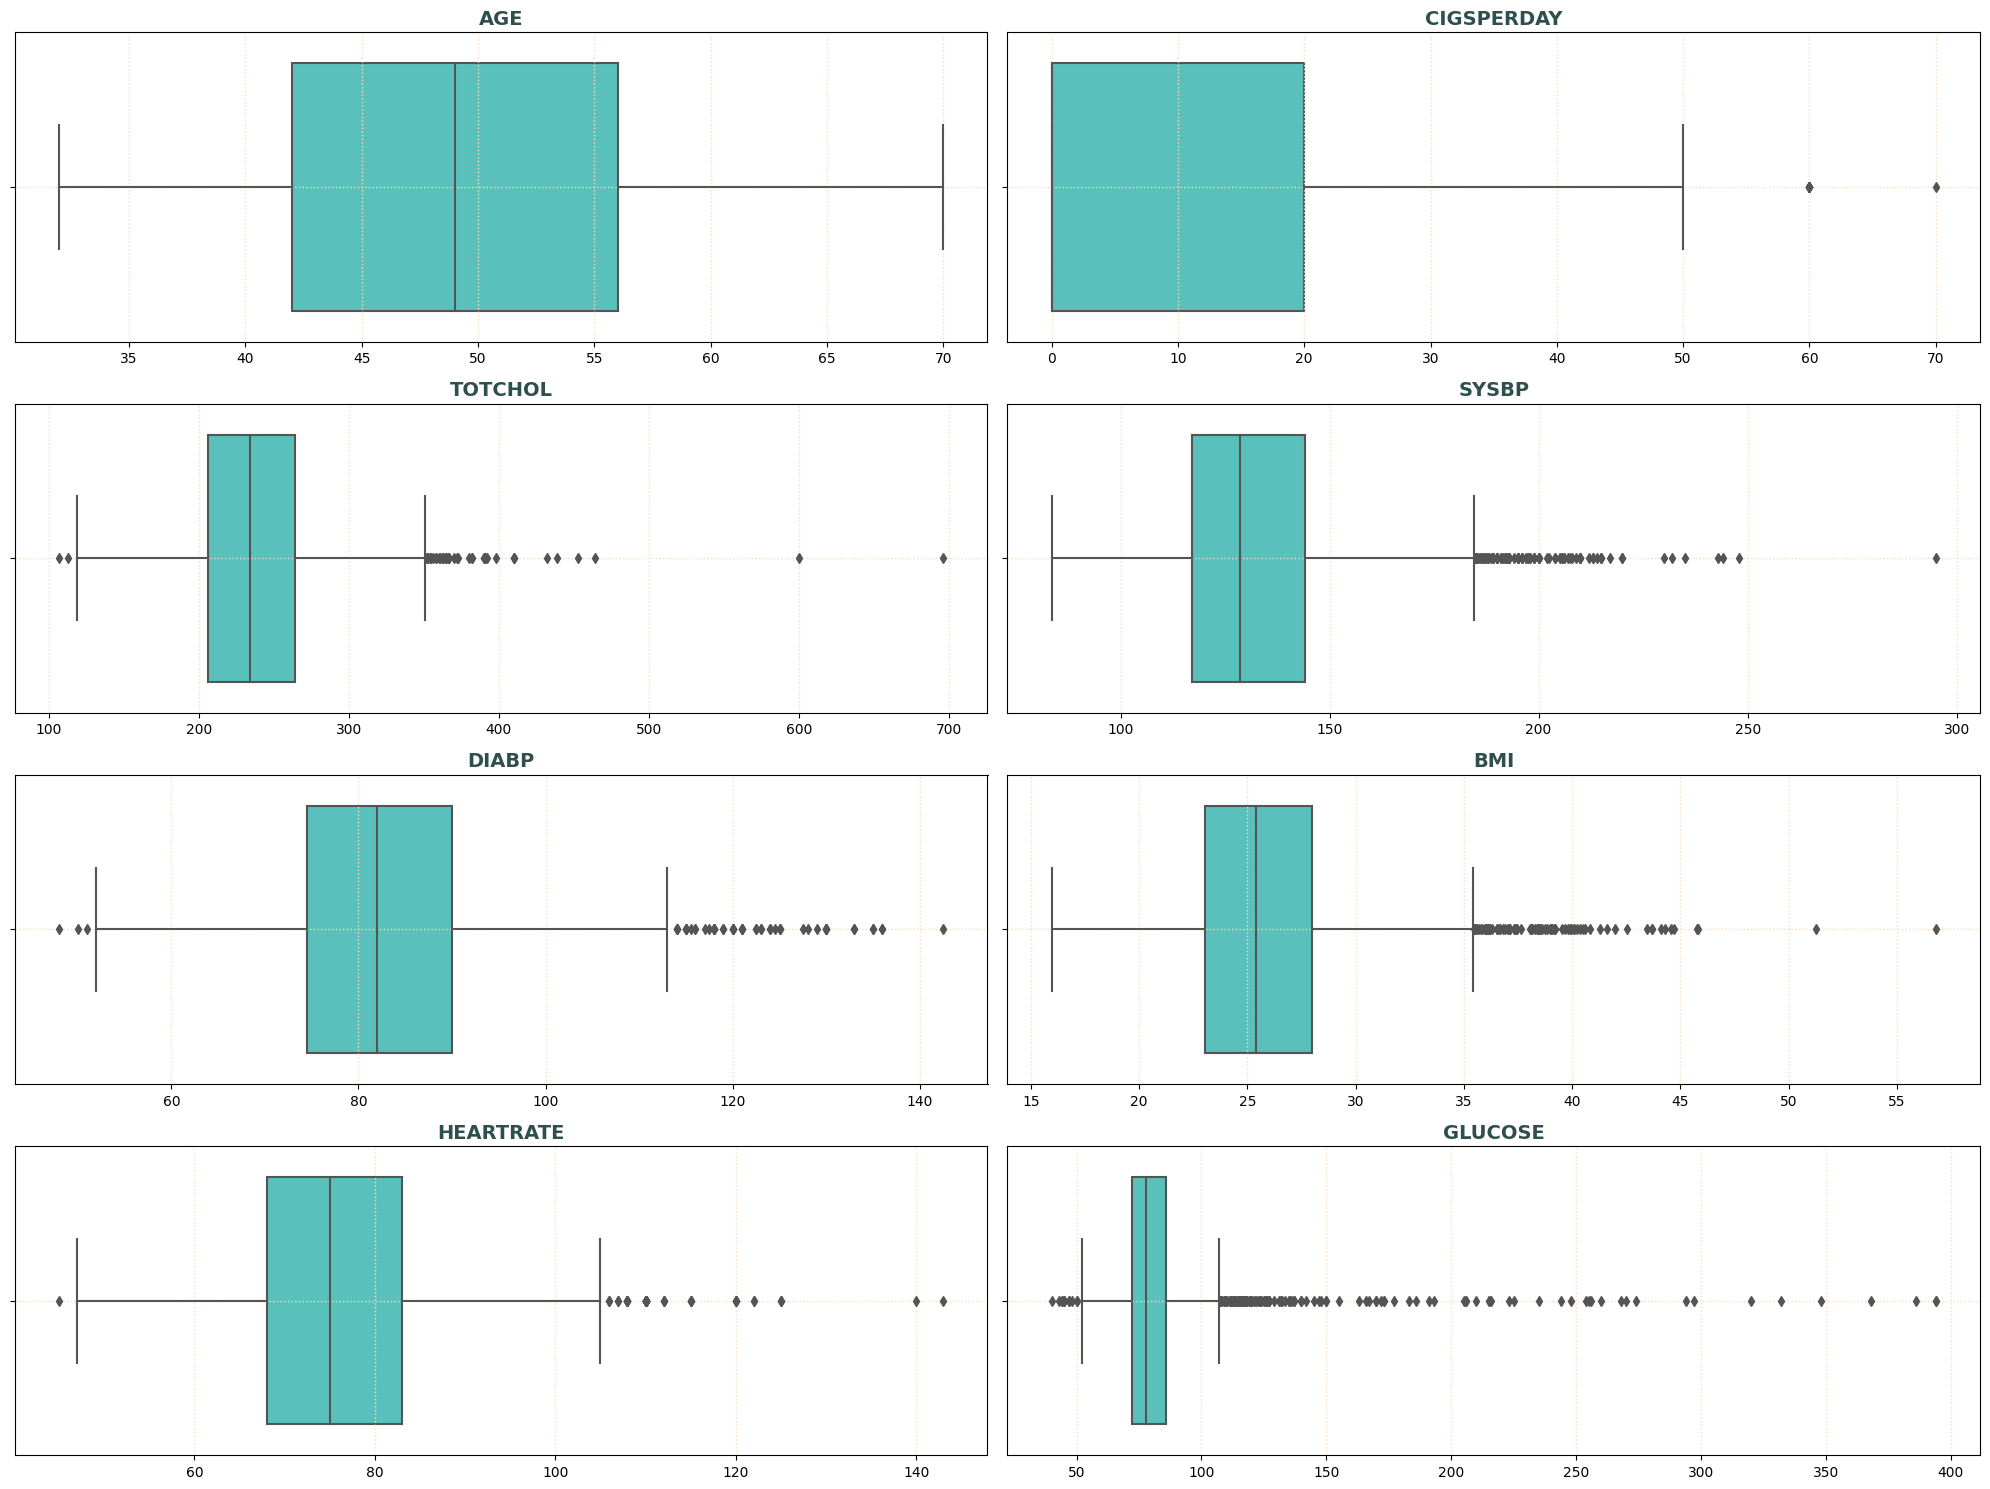

In [134]:
# We visually explore numerical variables: median, percentiles, outliers...

fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat

for index, column in enumerate(df_num.columns):
    sns.boxplot(x = df_num[column],
        data = df, ax=axes[index], 
        color = 'mediumturquoise'),
    axes[index].grid(color= 'peachpuff', linestyle= 'dotted', linewidth = 1)
    axes[index].set_title(column.upper(), fontsize = 14, color = 'darkslategray', fontweight = "bold")
    axes[index].set_xlabel('')
    
plt.tight_layout()
plt.show();

We have many outliers, but they are possible values in the medical field and may be interesting for our predictions. We do not manipulate them.

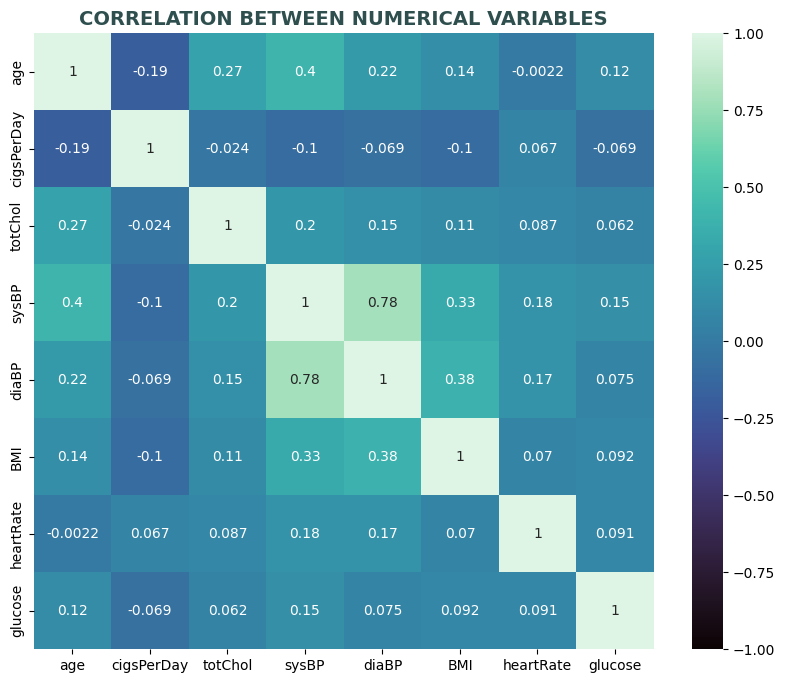

In [135]:
# We investigate the correlation among numerical categories.

sns.heatmap(df_num.corr(),
            annot = True,
            vmin = -1,
            cmap = 'mako',
            vmax = 1)

plt.title('CORRELATION BETWEEN NUMERICAL VARIABLES', fontsize = 14, color = 'darkslategray', fontweight = "bold");

We only have a strong correlation in the columns for systolic blood pressure (sysBP) and diastolic blood pressure (diaBP), which makes sense as these are the two values used to measure blood pressure. If one of them increases, the other usually increases as well.

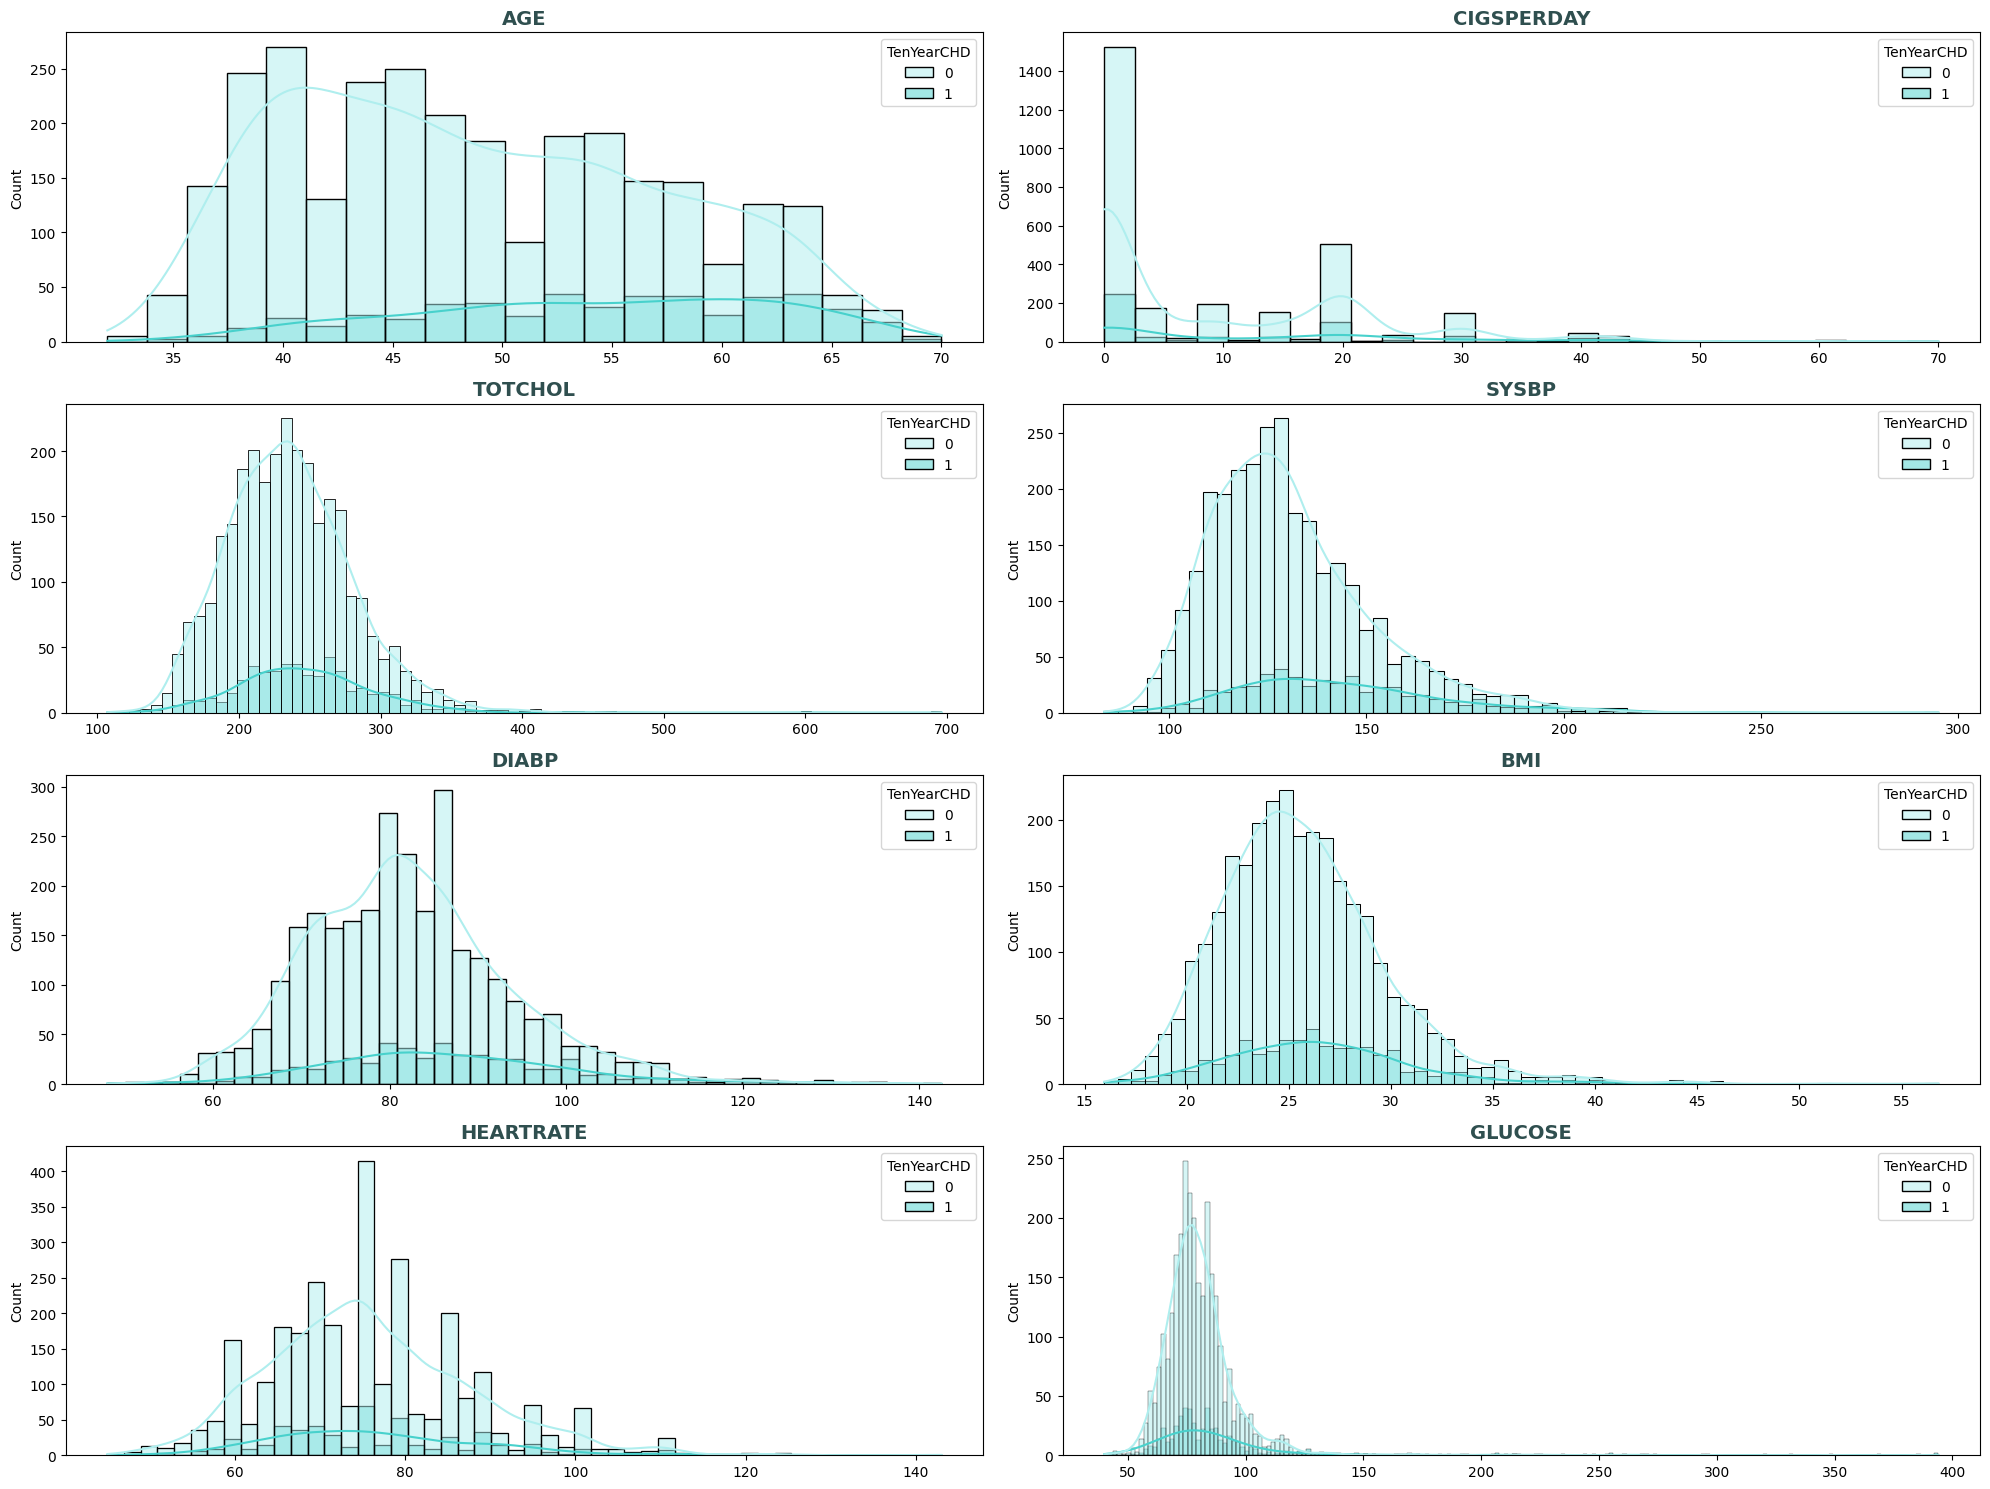

In [136]:
# We study the distribution of numerical variables with respect to the response variable.

fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat

my_palette_2 = ['paleturquoise', 'mediumturquoise']

for index, column in enumerate(df_num.columns):
        sns.histplot(x = df_num[column],
            hue = response_var,
            data = df,
            ax=axes[index], 
            palette = my_palette_2,
            kde = True)
        axes[index].set_title(column.upper(), fontsize = 14, color = 'darkslategray', fontweight = "bold")
        axes[index].set_xlabel('')

plt.tight_layout()
plt.show();

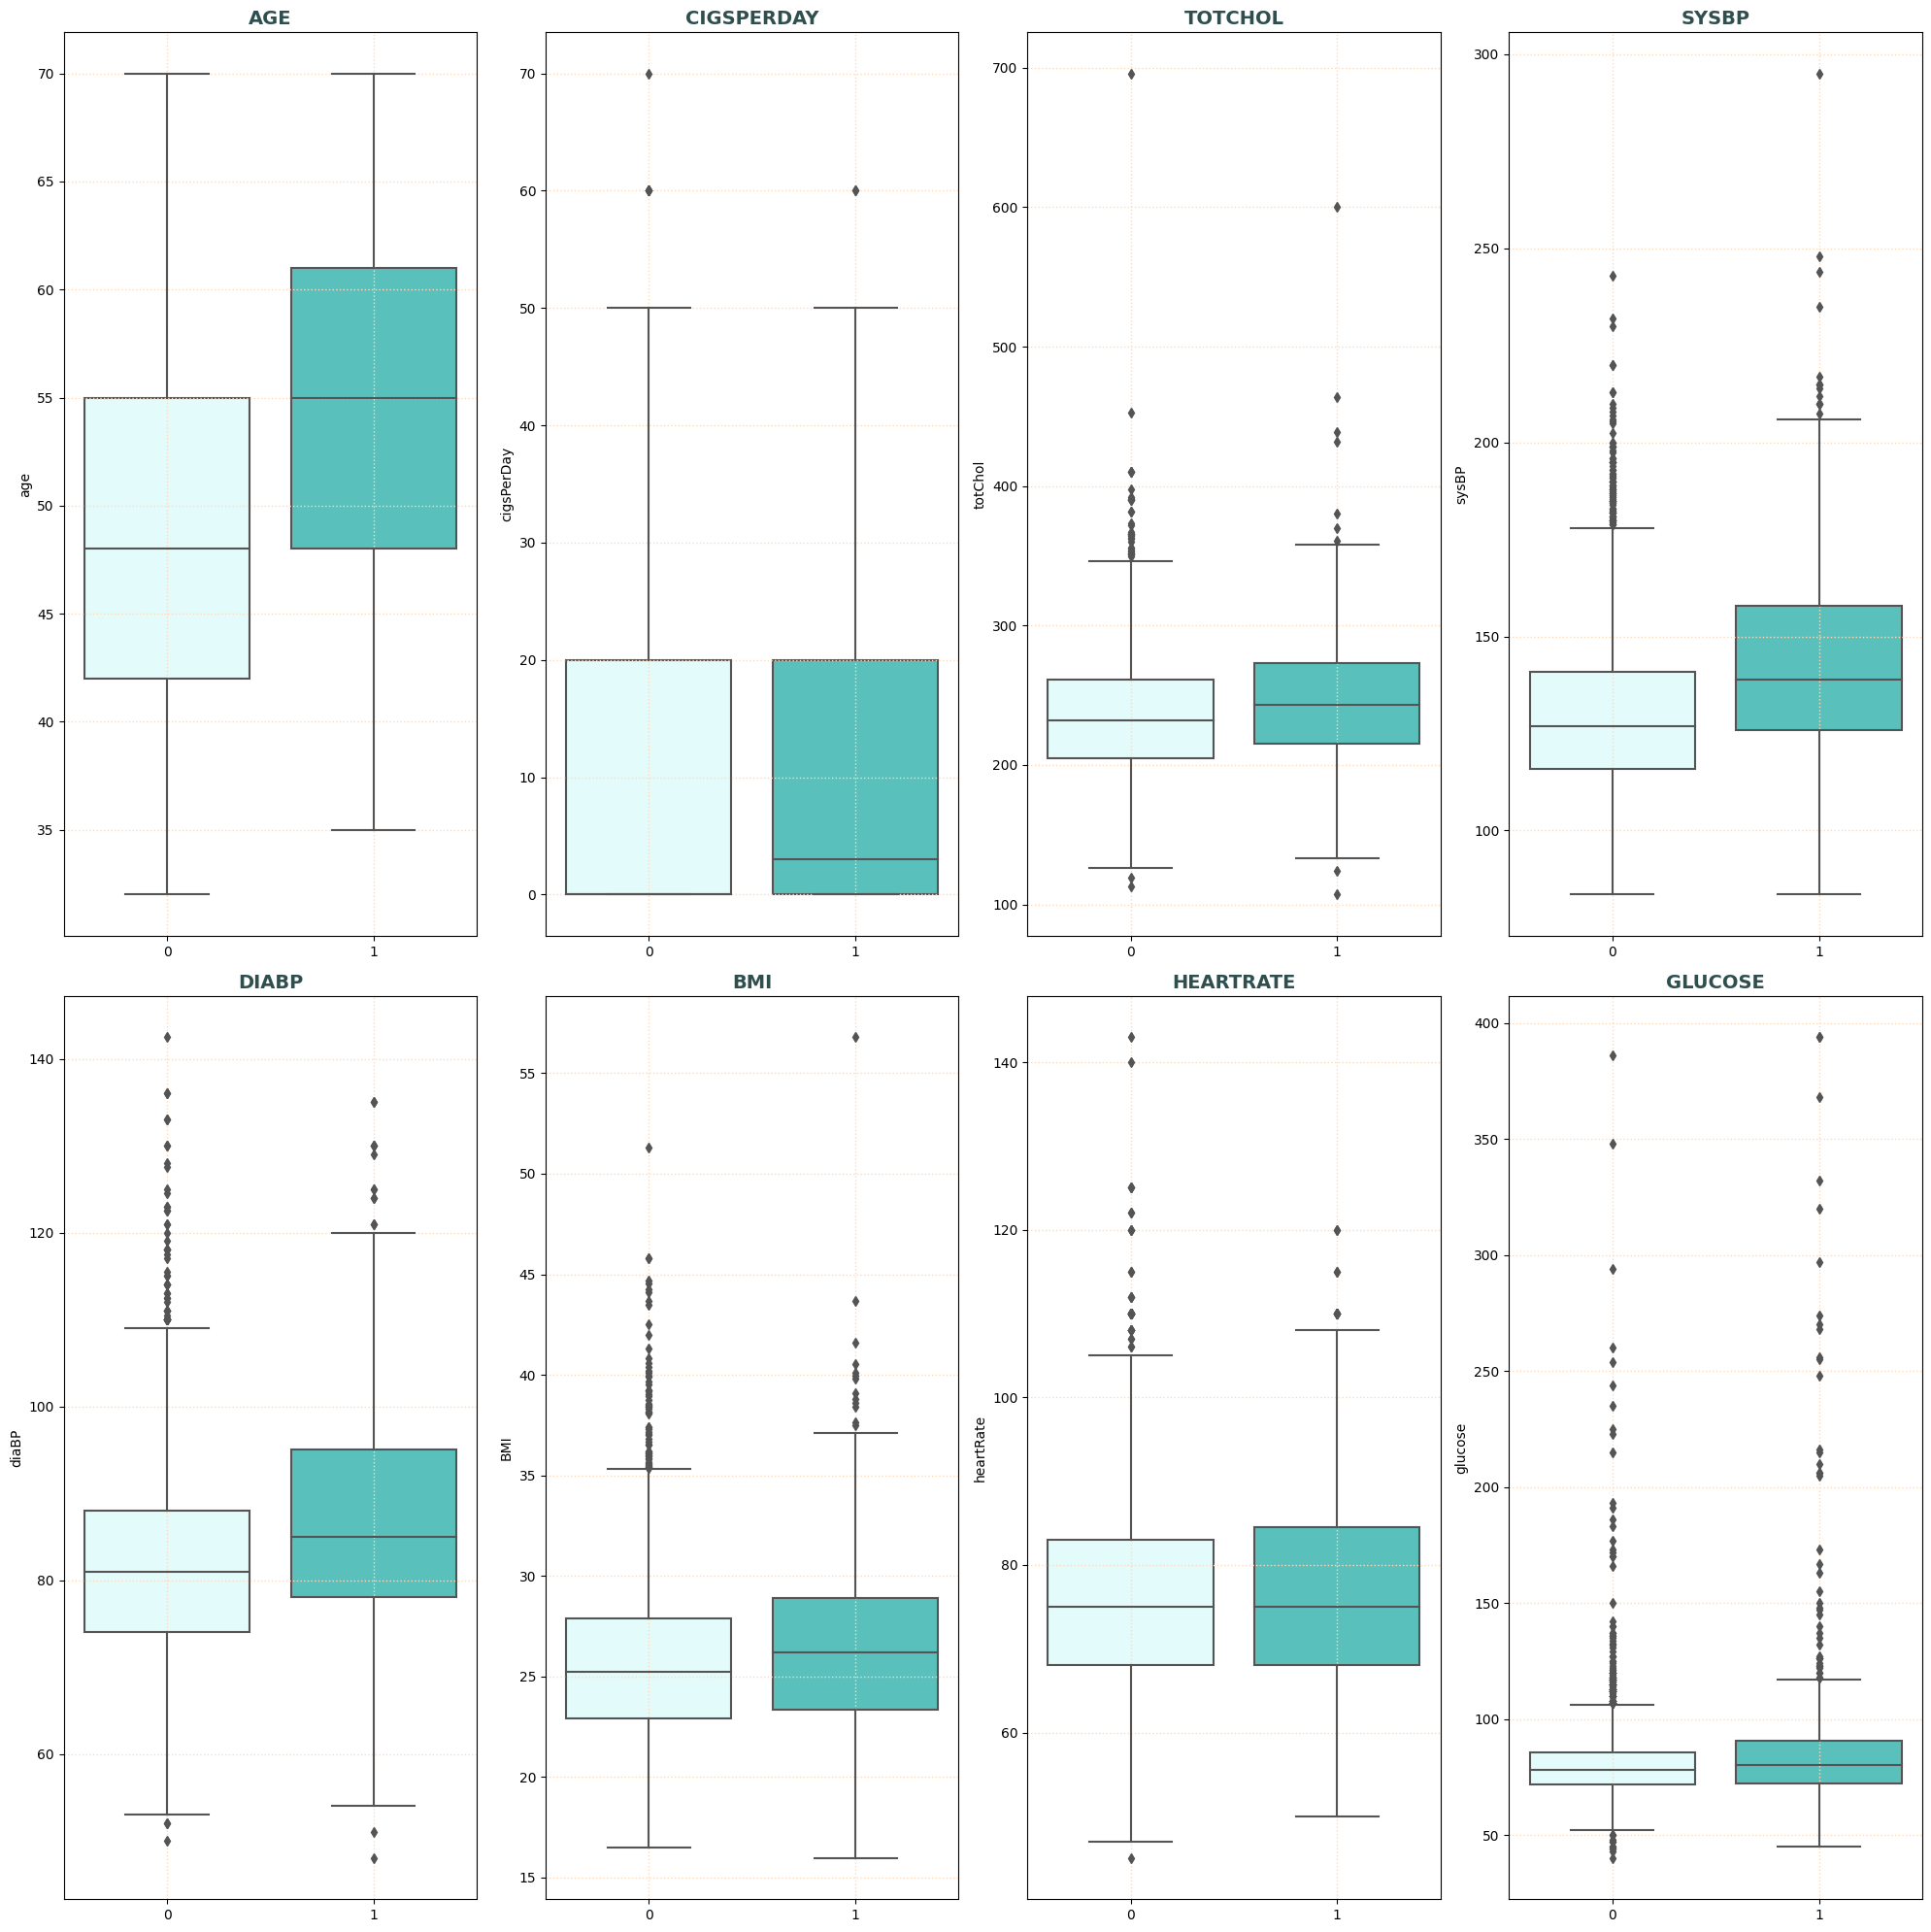

In [137]:
# We examine the correlation between numerical variables and the response variable.

fig, axes = plt.subplots(2, 4, figsize=(20,20))
axes = axes.flat

my_palette_3 = ['lightcyan', 'mediumturquoise']

for index, column in enumerate(df_num.columns):
        sns.boxplot(y = df_num[column],
            x = response_var,
            data = df,
            palette = my_palette_3,
            ax=axes[index])
        axes[index].grid(color= 'peachpuff', linestyle= 'dotted', linewidth = 1)
        axes[index].set_title(column.upper(), fontsize = 14, color = 'darkslategray', fontweight = "bold")
        axes[index].set_xlabel('')
        
plt.tight_layout()
plt.show();

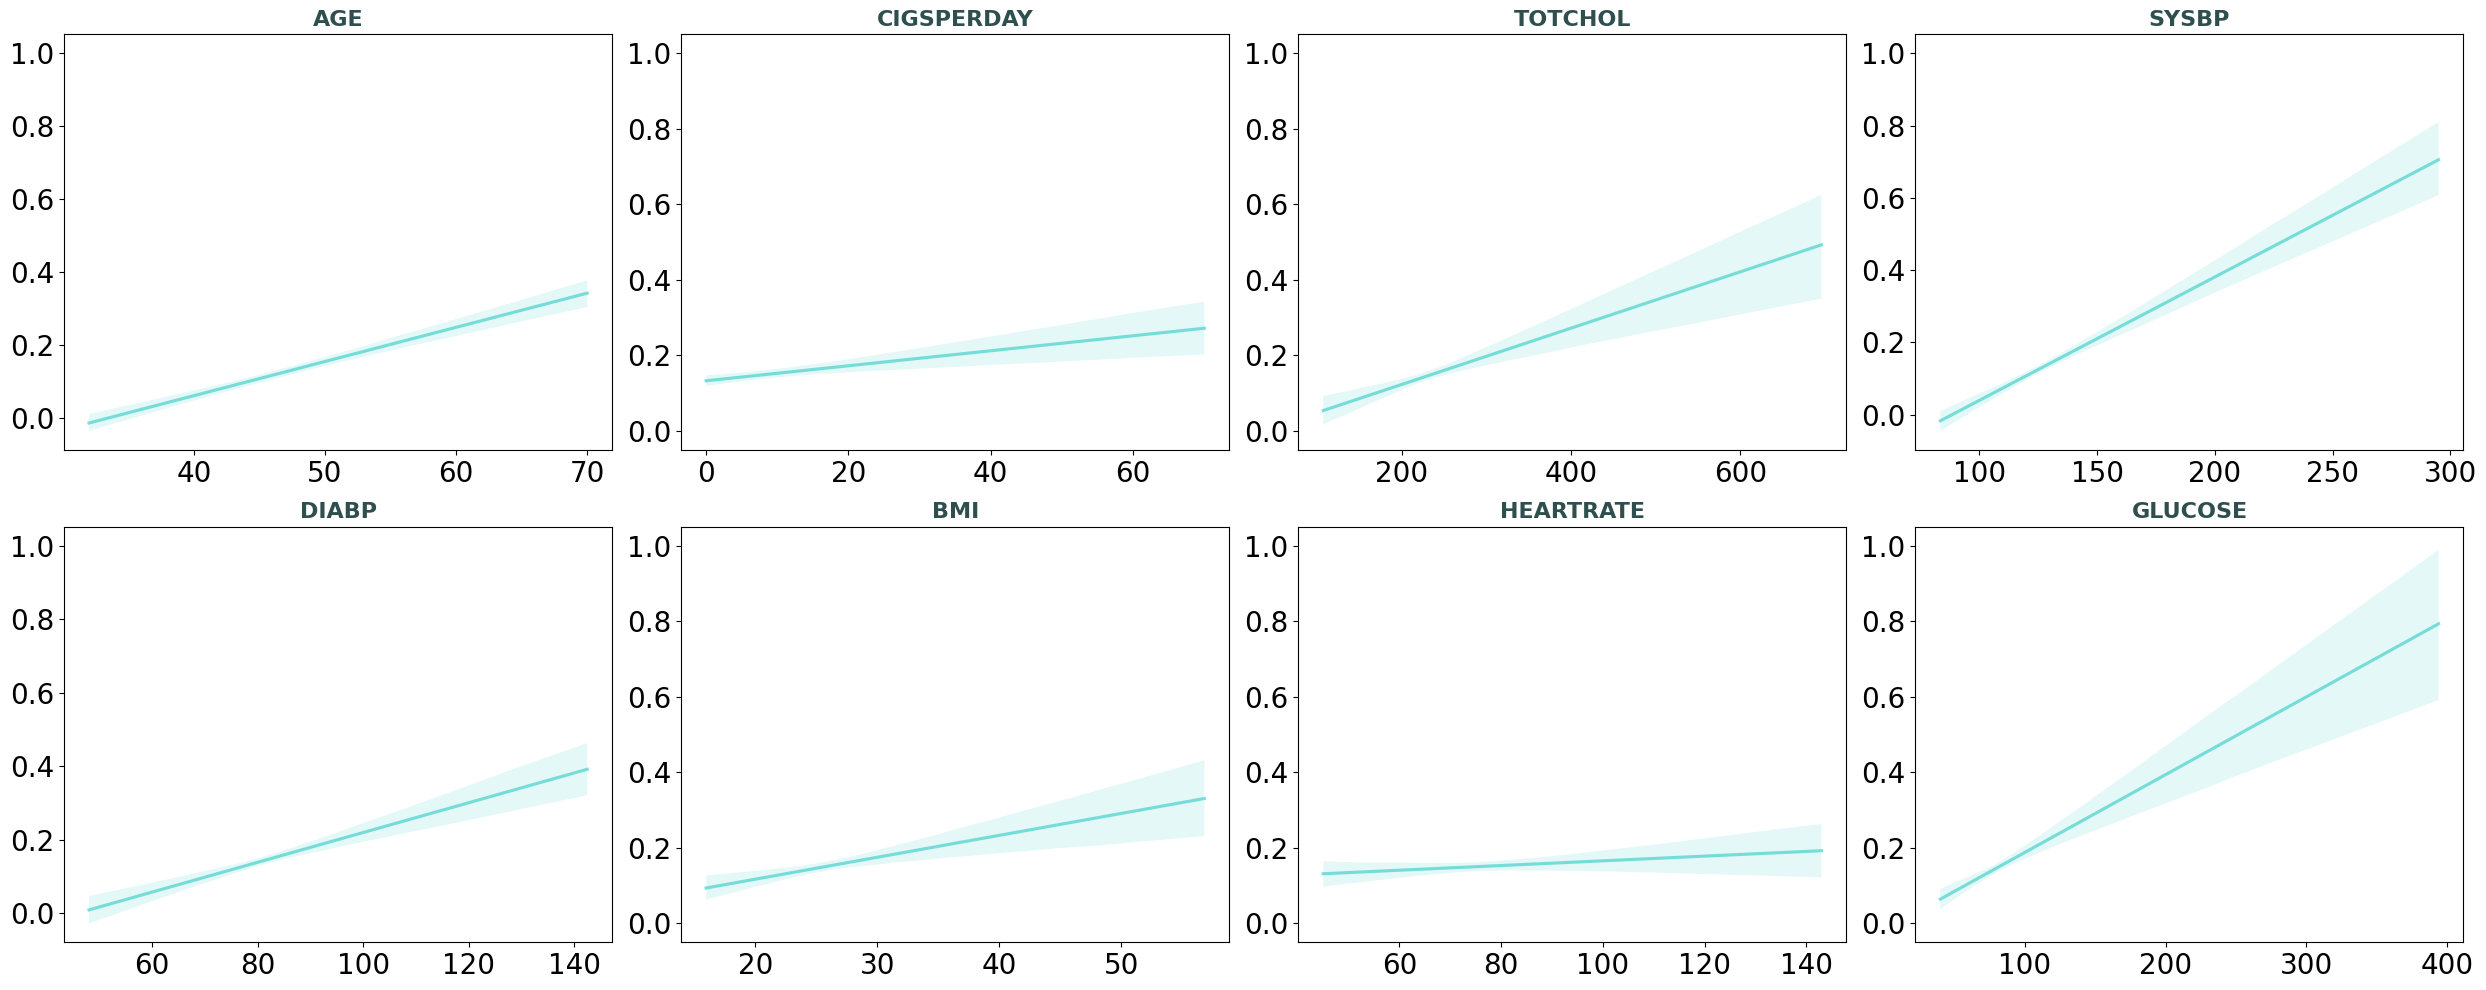

In [138]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (25, 10))

axes = axes.flat

for index, column in enumerate(df_num):
    sns.regplot(
        x = df[column], 
        y = df[response_var], 
        color = 'gray', 
        marker = '', 
        scatter_kws = {'alpha': 0.4}, 
        line_kws = {'color': 'mediumturquoise','alpha': 0.7 }, 
        ax = axes[index])
    
    axes[index].set_title(column.upper(), fontsize = 16, color = 'darkslategray', fontweight = "bold")
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    axes[index].tick_params(labelsize = 20)

    
fig.tight_layout();

### RESPONSE VARIABLE
----

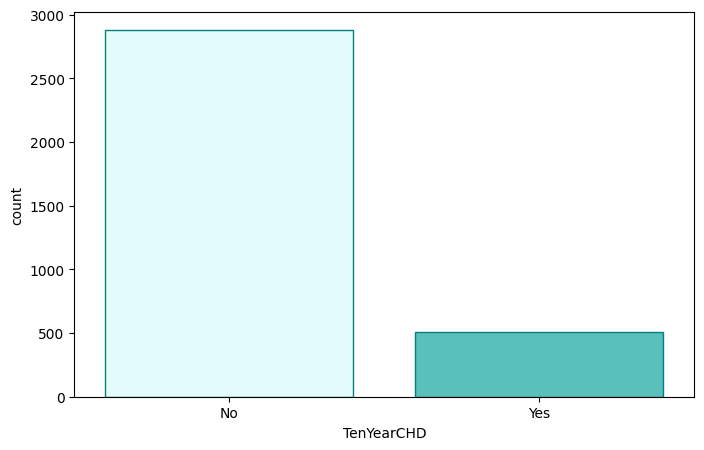

In [139]:
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = response_var,  palette = my_palette_3,  edgecolor='teal')
fig1.set(xticklabels=['No', 'Yes']) 

plt.show();

In [140]:
# We check the percentage.

df[response_var].value_counts() / df.shape[0]

TenYearCHD
0    0.849263
1    0.150737
Name: count, dtype: float64

### SAVE CHANGES
----


In [141]:
df.to_pickle('../data/cardio_risk.pkl')